In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming "SleepStudyData.csv" is in the same directory as your script
file_path = "SleepStudyData.csv"

# Read the CSV file into a DataFrame
sleep_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
sleep_data.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


Here is a description of each of the variables contained within the dataset.

Enough = Do you think that you get enough sleep?
Hours = On average, how many hours of sleep do you get on a weeknight?
PhoneReach = Do you sleep with your phone within arms reach?
PhoneTime = Do you use your phone within 30 minutes of falling asleep?
Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)
Breakfast = Do you typically eat breakfast?

In [78]:
sleeping_houres = sleep_data["Hours"]
sleeping_houres.value_counts()

Hours
7.0     35
6.0     24
8.0     16
5.0     12
9.0      8
4.0      4
2.0      2
10.0     1
Name: count, dtype: int64

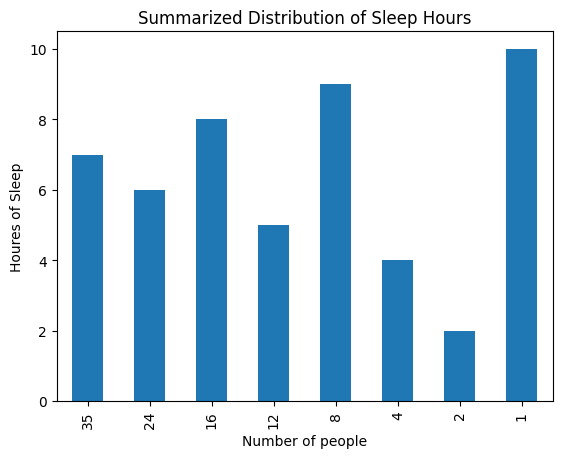

In [91]:
# Assuming 'hours_value_counts' is your Series
# Convert the Series to a DataFrame
# Extract the 'Hours' column
sleeping_hours = sleep_data['Hours']

# Reset the index of the Series
sleeping_hours_reseted = sleeping_hours.reset_index()

# Rename the columns for clarity
sleeping_hours_reseted.columns = ['Index', 'Hours']

# Group by the 'Hours' and count the occurrences
grouped_sleep_data = sleeping_hours_reseted.groupby('Hours').count().reset_index()

# Sort the DataFrame by 'Hours' in descending order
grouped_sleep_data = grouped_sleep_data.sort_values(by='Index', ascending=False)

# Plotting the grouped data
grouped_sleep_data.plot(kind='bar', x='Index', y='Hours', legend=False)
plt.xlabel('Number of people')
plt.ylabel('Houres of Sleep')
plt.title('Summarized Distribution of Sleep Hours')
plt.show()

In [50]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enough      104 non-null    object 
 1   Hours       102 non-null    float64
 2   PhoneReach  104 non-null    object 
 3   PhoneTime   104 non-null    object 
 4   Tired       104 non-null    int64  
 5   Breakfast   104 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.0+ KB


In [51]:
# Create a boolean condition for filtering
sl_enough_wt = (sleep_data["Enough"] == "Yes") & (sleep_data["PhoneReach"] == "Yes")

# Apply the condition to the DataFrame
a_sl_enough_wt = sleep_data[sl_enough_wt]

# Display the first few rows of the filtered DataFrame
a_sl_enough_wt.head()


,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
2,Yes,6.0,Yes,Yes,2,Yes
6,Yes,7.0,Yes,Yes,3,Yes
12,Yes,7.0,Yes,Yes,3,No
13,Yes,8.0,Yes,Yes,2,No


In [52]:
a_sl_enough_wt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 0 to 103
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enough      23 non-null     object 
 1   Hours       23 non-null     float64
 2   PhoneReach  23 non-null     object 
 3   PhoneTime   23 non-null     object 
 4   Tired       23 non-null     int64  
 5   Breakfast   23 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ KB


# Get the value counts for multiple columns
value_counts_result = a_sl_enough_wt[["Column1", "Column2"]].value_counts()

# Display the result
print(value_counts_result)


In [53]:
sl_enough_wot = (sleep_data["Enough"] == "Yes") & (sleep_data["PhoneReach"] == "No")
a_sl_enough_wot = sleep_data[sl_enough_wot]

# Display the first few rows of the filtered DataFrame
a_sl_enough_wot.head()


,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
14,Yes,7.0,No,Yes,3,Yes
29,Yes,9.0,No,No,2,Yes
36,Yes,7.0,No,No,2,Yes
37,Yes,9.0,No,Yes,2,Yes
40,Yes,8.0,No,Yes,1,Yes


Now we can compare the quantity of persons who slept well with and without tepehon.


In [54]:
a_sl_enough_wot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 14 to 95
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enough      13 non-null     object 
 1   Hours       12 non-null     float64
 2   PhoneReach  13 non-null     object 
 3   PhoneTime   13 non-null     object 
 4   Tired       13 non-null     int64  
 5   Breakfast   13 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 728.0+ bytes


We see that with telephone slept 23 Persons and without 13 Persons, thats says us, that it is unsignificant influence 
on the sleep process.

Now we will try to find out the dependence between breakfast & tiredness over the day

In [55]:
get_br_and_tired = (sleep_data["Breakfast"] == "Yes") & (sleep_data["Tired"] == 5)

result_get_br_and_tired = sleep_data[get_br_and_tired]
result_get_br_and_tired.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
47,No,5.0,No,No,5,Yes
73,No,6.0,No,Yes,5,Yes
86,No,9.0,No,Yes,5,Yes


In [56]:
no_br_and_tired = (sleep_data["Breakfast"] == "No") & (sleep_data["Tired"] == 5)

result_no_br_and_tired = sleep_data[no_br_and_tired]
result_no_br_and_tired.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
20,No,2.0,Yes,Yes,5,No
25,No,7.0,No,Yes,5,No
38,No,5.0,Yes,No,5,No
44,No,4.0,No,No,5,No
57,No,9.0,No,Yes,5,No


compare the data

In [57]:
result_no_br_and_tired.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 20 to 63
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enough      7 non-null      object 
 1   Hours       7 non-null      float64
 2   PhoneReach  7 non-null      object 
 3   PhoneTime   7 non-null      object 
 4   Tired       7 non-null      int64  
 5   Breakfast   7 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 392.0+ bytes


In [58]:
result_get_br_and_tired.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 47 to 86
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enough      3 non-null      object 
 1   Hours       3 non-null      float64
 2   PhoneReach  3 non-null      object 
 3   PhoneTime   3 non-null      object 
 4   Tired       3 non-null      int64  
 5   Breakfast   3 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 168.0+ bytes


Now we compare the quality of sleep with telephone use before sleep 

In [59]:
sleep_with_phonetime = (sleep_data["Enough"] == "No") & (sleep_data["PhoneTime"] == "Yes")

a_sleep_with_phonetime = sleep_data[sleep_with_phonetime]
a_sleep_with_phonetime.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
1,No,6.0,Yes,Yes,3,No
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes
5,No,7.0,Yes,Yes,4,No
7,No,7.0,Yes,Yes,3,Yes


In [60]:
esleep_with_phonetime = (sleep_data["Enough"] == "Yes") & (sleep_data["PhoneTime"] == "Yes")

a_esleep_with_phonetime = sleep_data[esleep_with_phonetime]
a_esleep_with_phonetime.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
2,Yes,6.0,Yes,Yes,2,Yes
6,Yes,7.0,Yes,Yes,3,Yes
12,Yes,7.0,Yes,Yes,3,No
13,Yes,8.0,Yes,Yes,2,No


In [61]:
a_sleep_with_phonetime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 1 to 100
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enough      55 non-null     object 
 1   Hours       55 non-null     float64
 2   PhoneReach  55 non-null     object 
 3   PhoneTime   55 non-null     object 
 4   Tired       55 non-null     int64  
 5   Breakfast   55 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ KB


In [62]:
a_esleep_with_phonetime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 103
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enough      29 non-null     object 
 1   Hours       28 non-null     float64
 2   PhoneReach  29 non-null     object 
 3   PhoneTime   29 non-null     object 
 4   Tired       29 non-null     int64  
 5   Breakfast   29 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.6+ KB


Here we see, that who sleeps after the telephone usage sleeps worther (55 Persons) as one who sleeps without telephone usage before sleep (29 Person)

In [63]:
value_counts_result = sleep_data[["Enough", "PhoneTime"]].value_counts()
print(value_counts_result)

Enough  PhoneTime
No      Yes          55
Yes     Yes          29
No      No           13
Yes     No            7
Name: count, dtype: int64


In [67]:
sleeping_houres = sleep_data["Hours"].value_counts()
print(sleeping_houres)

Hours
7.0     35
6.0     24
8.0     16
5.0     12
9.0      8
4.0      4
2.0      2
10.0     1
Name: count, dtype: int64


Lets see if a persons that slept 5 - 9 houres feels well slept?

In [71]:
sleepenough_hours = (sleep_data["Enough"] == "Yes") & (sleep_data["Hours"] == 5)
a_sleepenought_hours_5 = sleep_data[sleepenough_hours]
a_sleepenought_hours_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enough      0 non-null      object 
 1   Hours       0 non-null      float64
 2   PhoneReach  0 non-null      object 
 3   PhoneTime   0 non-null      object 
 4   Tired       0 non-null      int64  
 5   Breakfast   0 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 0.0+ bytes


Here we see, that no one of all 12 Person who slept 5 houres get enough sleep. 

In [72]:
sleepenough_hours = (sleep_data["Enough"] == "Yes") & (sleep_data["Hours"] == 6)
a_sleepenought_hours_6 = sleep_data[sleepenough_hours]
a_sleepenought_hours_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 2 to 103
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enough      6 non-null      object 
 1   Hours       6 non-null      float64
 2   PhoneReach  6 non-null      object 
 3   PhoneTime   6 non-null      object 
 4   Tired       6 non-null      int64  
 5   Breakfast   6 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 336.0+ bytes


Here just 6 Person from 24 Persons feel gut after sleeping 6 houres. It is just 25%. 

In [73]:
sleepenough_hours = (sleep_data["Enough"] == "Yes") & (sleep_data["Hours"] == 7)
a_sleepenought_hours_7 = sleep_data[sleepenough_hours]
a_sleepenought_hours_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 6 to 102
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enough      13 non-null     object 
 1   Hours       13 non-null     float64
 2   PhoneReach  13 non-null     object 
 3   PhoneTime   13 non-null     object 
 4   Tired       13 non-null     int64  
 5   Breakfast   13 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 728.0+ bytes


Here we see, the instead of the most spreaded time for sleep, just 30% of all 7hours sleepers feel slept enough

In [74]:
sleepenough_hours = (sleep_data["Enough"] == "Yes") & (sleep_data["Hours"] == 8)
a_sleepenought_hours_8 = sleep_data[sleepenough_hours]
a_sleepenought_hours_8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 101
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enough      12 non-null     object 
 1   Hours       12 non-null     float64
 2   PhoneReach  12 non-null     object 
 3   PhoneTime   12 non-null     object 
 4   Tired       12 non-null     int64  
 5   Breakfast   12 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 672.0+ bytes


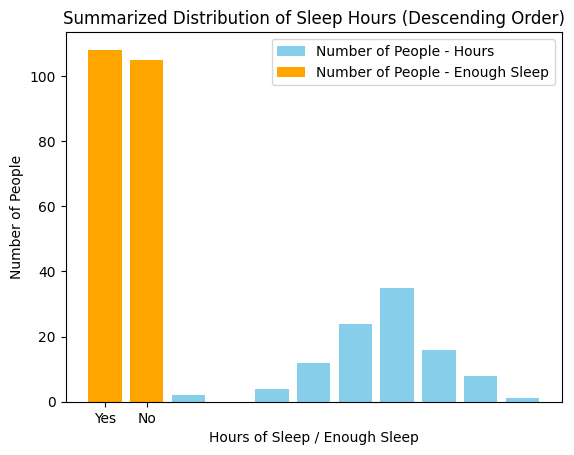

In [92]:
# Extract the 'Hours' and 'Enough' columns
sleeping_hours = sleep_data['Hours']
enough_sleeping = sleep_data['Enough']

# Reset the index of the Series
sleeping_hours_reseted = sleeping_hours.reset_index()
enough_sleeping_reseted = enough_sleeping.reset_index()

# Rename the columns for clarity
sleeping_hours_reseted.columns = ['Index', 'Hours']
enough_sleeping_reseted.columns = ['Index', 'Enough']

# Group by the 'Hours' and count the occurrences
grouped_sleep_data = sleeping_hours_reseted.groupby('Hours').count().reset_index()

# Sort the DataFrame by 'Hours' in descending order
grouped_sleep_data = grouped_sleep_data.sort_values(by='Hours', ascending=False)

# Plotting the grouped data
plt.bar(grouped_sleep_data['Hours'], grouped_sleep_data['Index'], color='skyblue', label='Number of People - Hours')

# Add a second set of bars for 'Enough'
plt.bar(enough_sleeping_reseted['Enough'], enough_sleeping_reseted['Index'] + 5, color='orange', label='Number of People - Enough Sleep')

plt.xlabel('Hours of Sleep / Enough Sleep')
plt.ylabel('Number of People')
plt.title('Summarized Distribution of Sleep Hours (Descending Order)')
plt.legend()


In [98]:
# Extract the 'Hours' and 'Enough' columns
sleeping_hours = sleep_data['Hours']
enough_sleeping = sleep_data['Enough']

# Combine 'Hours' and 'Enough' into a new column
combined_data = sleep_data['Hours'].astype(str) + ' Hours, ' + sleep_data['Enough']

# Count occurrences of combined data
combined_data_counts = combined_data.value_counts().reset_index()

# Sort the DataFrame by the combined data
combined_data_counts = combined_data_counts.sort_values(by='index')

# Split the combined data into 'Hours' and 'Enough Sleep'
hours_data = combined_data_counts[combined_data_counts['index'].str.contains('Hours')].reset_index(drop=True)
enough_data = combined_data_counts[combined_data_counts['index'].str.contains('Enough')].reset_index(drop=True)

# Plotting the grouped data with different colors
plt.bar(hours_data.index, hours_data['index'].apply(lambda x: int(x.split()[0])), color='skyblue', label='Hours of Sleep')
plt.bar(enough_data.index, enough_data['index'].apply(lambda x: int(x.split()[0])), color='orange', label='Enough Sleep')

plt.ylabel('Hours of Sleep and Enough Sleep')
plt.xlabel('Number of People')
plt.title('Combined Distribution of Sleep Hours and Enough Sleep')
plt.xticks(combined_data_counts.index, combined_data_counts['index'], rotation=45, ha='right')  # Adjust x-axis labels
plt.legend()
plt.show()



ValueError: invalid literal for int() with base 10: '10.0'